# Notebook: Modelos de Clasificación y Métricas de Evaluación

Juan David Garcia Zapata

## 1. Introducción.
En este notebook exploraremos los modelos de clasificación, aplicaremos algunos algoritmos y evaluaremos su rendimiento utilizando métricas comunes, incluyendo el AUC y la elección del umbral para la clasificación. Utilizaremos el dataset de breast_cancer para estas tareas.

## 2. Cargar Librerías y Dataset

Primero, cargamos las librerías necesarias y el dataset.

In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler


# Cargar el dataset Iris
#iris = load_iris()
#X = iris.data
#y = iris.target

# Cargar el dataset de cáncer de mama
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
# prompt: como veo la descripción de los datos de breast_cancer

print(data.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

#### Pregunta: ¿Qué características tiene el dataset? ¿cuál es la variable objetivo? (Ayuda: Mira data.feature_names y data.target_names)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

 Utiliza pd.DataFrame para crear un DataFrame de pandas con el dataset y visualízalo

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

El dataset está compuesto por 30 características numéricas que describen diferentes aspectos físicos de los tumores, y la variable objetivo es un valor binario que clasifica a los tumores como malignos o benignos. Las características incluyen una variedad de métricas relacionadas con el tamaño, la textura y la forma de las células tumorales, y se utilizan para entrenar modelos de clasificación en la detección del cáncer de mama.

In [ ]:
# Crear DataFrame
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 3. Preparar los Datos
Dividimos los datos en conjunto de entrenamiento y conjunto de prueba.

In [ ]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### pregunta: ¿Por qué es importante escalar los datos antes de aplicar modelos de clasificación?

Escalar los datos antes de aplicar modelos de clasificación es crucial porque asegura que todas las características tengan la misma influencia en el modelo, mejora la eficiencia y convergencia de los algoritmos basados en gradiente, y evita sesgos en algoritmos basados en distancias, como k-NN. Además, ayuda a prevenir problemas numéricos y, en general, puede mejorar el rendimiento y la precisión del modelo.

## 4. Entrenamiento de modelos:

In [ ]:
# Inicializar modelos
log_reg = LogisticRegression(max_iter=10000)

# Entrenar los modelos
log_reg.fit(X_train_scaled, y_train)

# Realizar predicciones y calcular probabilidades
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:,1]

## 5. Evaluación del desempeño del modelo:
Calcularemos y mostraremos las métricas de evaluación para cada modelo, incluyendo el AUC.

In [ ]:
# Evaluar los modelos
metrics = {}
for name, y_prob in zip(["Logistic Regression"],
                         [y_prob_log_reg]):

    y_pred = (y_prob > 0.5).astype(int)  # Convertir probabilidades a clases utilizando umbral de 0.5

    metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

# Mostrar resultados
for model, metric in metrics.items():
    print(f"--- {model} ---")
    for key, value in metric.items():
        print(f"{key}: \n{value}\n")


--- Logistic Regression ---
Accuracy: 
0.9824561403508771

Precision: 
0.9906542056074766

Recall: 
0.9814814814814815

F1 Score: 
0.986046511627907

AUC: 
0.9979423868312757

Confusion Matrix: 
[[ 62   1]
 [  2 106]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171




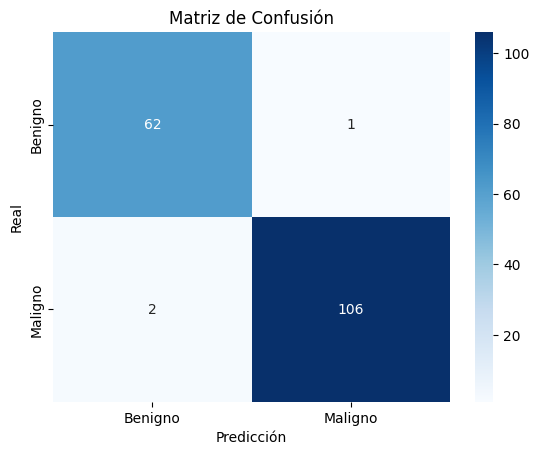

In [ ]:
# Matriz de confusión
y_pred = ( y_prob_log_reg> 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


### Preguntas: ¿Qué información te proporciona la matriz de confusión sobre el desempeño del modelo? ¿cuál es la exactitud y el error del modelo? ¿cómo se interpreta la precisión y recall?

La matriz de confusión muestra que el modelo clasifica correctamente la mayoría de los casos, con 106 predicciones correctas de maligno y 62 de benigno. La exactitud del modelo es del 98.25%, con un error del 1.75%. La precisión indica que el 99.06% de las predicciones de maligno son correctas, y el recall muestra que el 98.15% de los casos malignos reales son identificados correctamente. Esto refleja un excelente rendimiento del modelo en la clasificación de tumores.

## 4. Ajustar el umbral de decisión:

In [ ]:
# Definir una lista de umbrales
thresholds = [0.3, 0.5, 0.7]

for name, y_prob in zip(["Logistic Regression"],
                         [y_prob_log_reg]):

    print(f"--- {name} ---")
    for threshold in thresholds:
        y_pred_custom = (y_prob > threshold).astype(int)
        print(f"Umbral: {threshold}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred_custom)}")
        print(f"Precision: {precision_score(y_test, y_pred_custom)}")
        print(f"Recall: {recall_score(y_test, y_pred_custom)}")
        print(f"F1 Score: {f1_score(y_test, y_pred_custom)}")
        print(f"AUC: {roc_auc_score(y_test, y_prob)}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_custom)}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred_custom)}")
        print("\n")


--- Logistic Regression ---
Umbral: 0.3
Accuracy: 0.9766081871345029
Precision: 0.9727272727272728
Recall: 0.9907407407407407
F1 Score: 0.981651376146789
AUC: 0.9979423868312757
Confusion Matrix:
[[ 60   3]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Umbral: 0.5
Accuracy: 0.9824561403508771
Precision: 0.9906542056074766
Recall: 0.9814814814814815
F1 Score: 0.986046511627907
AUC: 0.9979423868312757
Confusion Matrix:
[[ 62   1]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       1

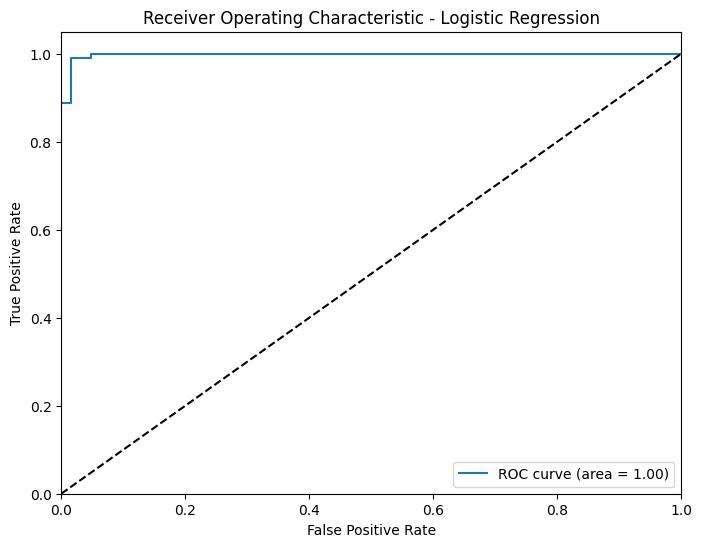

In [ ]:
from sklearn.metrics import roc_curve

# Función para trazar la curva ROC
def plot_roc_curve(y_test, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Graficar la curva ROC para cada modelo
for name, y_prob in zip(["Logistic Regression"],
                         [y_prob_log_reg]):
    plot_roc_curve(y_test, y_prob, name)


### Preguntas: ¿Qué información proporciona la curva ROC y el valor AUC sobre el rendimiento del modelo? ¿Por qué es importante el AUC?

La curva ROC  muestra cómo el modelo equilibra la detección de verdaderos positivos frente a falsos positivos en diferentes umbrales. El AUC, que en este caso es de 1.00, indica que el modelo tiene un rendimiento perfecto al distinguir entre las clases. Esto es un excelente resultado, pero también es importante considerar que un AUC de 1 podría ser una señal de sobreajuste (overfitting). El sobreajuste ocurre cuando el modelo ha aprendido demasiado bien los patrones específicos del conjunto de datos de entrenamiento, incluyendo posibles ruidos o detalles irrelevantes, lo que podría afectar negativamente su capacidad para generalizar a nuevos datos. Por lo tanto, aunque el AUC perfecto sugiere un rendimiento ideal, es prudente validar el modelo en diferentes conjuntos de datos o usar técnicas de validación cruzada para asegurarse de que este rendimiento no sea producto de un ajuste excesivo.

### Ejercicio: Entrena un modelo de regresión con un algoritmo diferente y compara sus resultados con el modelo de regresión logística.

# Entrenamiento de modelo via K-NN

Para este modelo necesitamos saber cual es el k-vecino optimo

El número óptimo de vecinos es 14
Mejor score obtenido: 0.9647468354430379


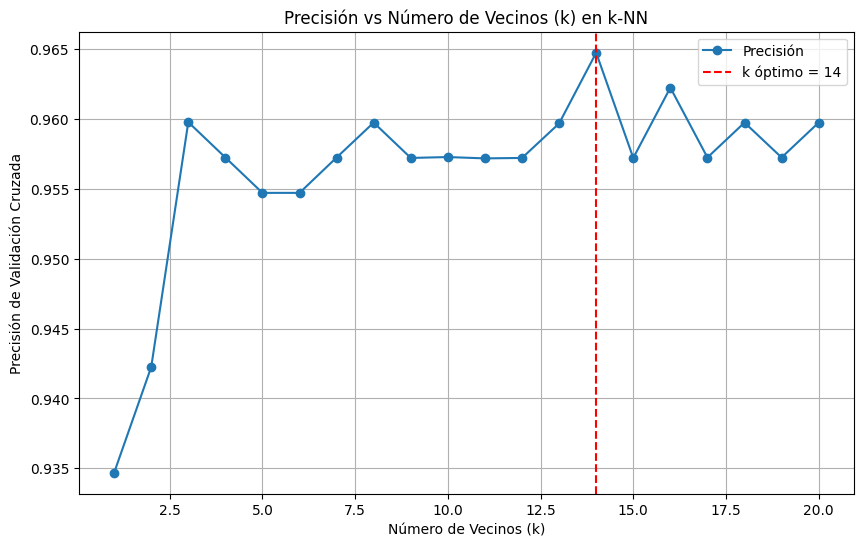

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir los valores de k a probar
param_grid = {'n_neighbors': np.arange(1, 21)}

# Inicializar el modelo k-NN
knn = KNeighborsClassifier()

# Configurar GridSearchCV
knn_gs = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Entrenar usando GridSearchCV
knn_gs.fit(X_train_scaled, y_train)

# Mejor valor de k encontrado
optimal_k = knn_gs.best_params_['n_neighbors']
print(f"El número óptimo de vecinos es {optimal_k}")

# Mejor score obtenido con ese valor de k
best_score = knn_gs.best_score_
print(f"Mejor score obtenido: {best_score}")

# Graficar la precisión frente a los diferentes valores de k
results = knn_gs.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], results['mean_test_score'], marker='o', label='Precisión')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'k óptimo = {optimal_k}')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión de Validación Cruzada')
plt.title('Precisión vs Número de Vecinos (k) en k-NN')
plt.legend()
plt.grid(True)
plt.show()



Se realiza búsqueda de hiperparámetros utilizando `GridSearchCV` para encontrar el número óptimo de vecinos (`n_neighbors`) en el modelo k-NN, identificando que 14 vecinos maximiza la precisión con un score de 0.9647 en la validación cruzada. en la grafica se puede observar como  varía la precisión según el número de vecinos,lo que puede  confirmar que 14 es el valor óptimo, asegurando que el modelo esté bien ajustado para obtener el mejor rendimiento posible.

## Entrenamiento

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo k-NN
knn = KNeighborsClassifier(n_neighbors=14)

# Entrenar el modelo k-NN
knn.fit(X_train_scaled, y_train)

# Realizar predicciones y calcular probabilidades
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Evaluar el modelo k-NN
metrics = {}
for name, y_prob in zip(["k-NN"], [y_prob_knn]):

    y_pred = (y_prob > 0.5).astype(int)  # Convertir probabilidades a clases utilizando un umbral de 0.5

    metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

# Mostrar resultados
for model, metric in metrics.items():
    print(f"--- {model} ---")
    for key, value in metric.items():
        print(f"{key}: \n{value}\n")


--- k-NN ---
Accuracy: 
0.9649122807017544

Precision: 
0.9636363636363636

Recall: 
0.9814814814814815

F1 Score: 
0.9724770642201834

AUC: 
0.9936067019400353

Confusion Matrix: 
[[ 59   4]
 [  2 106]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171




# Matrix de confusion

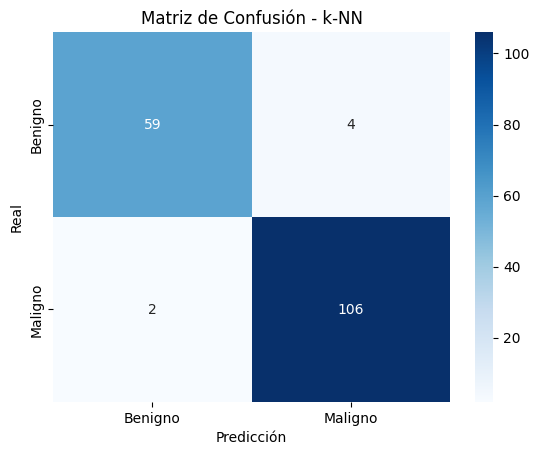

In [ ]:

import seaborn as sns
y_pred_knn = (y_prob_knn > 0.5).astype(int)

# Matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - k-NN')
plt.show()

## Ajustar el umbral de decisión:K-NN

In [ ]:
# Definir una lista de umbrales
thresholds = [0.3, 0.5, 0.7]

# Evaluar el modelo k-NN con diferentes umbrales
for name, y_prob in zip(["k-NN"], [y_prob_knn]):

    print(f"--- {name} ---")
    for threshold in thresholds:
        y_pred_custom = (y_prob > threshold).astype(int)
        print(f"Umbral: {threshold}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred_custom)}")
        print(f"Precision: {precision_score(y_test, y_pred_custom)}")
        print(f"Recall: {recall_score(y_test, y_pred_custom)}")
        print(f"F1 Score: {f1_score(y_test, y_pred_custom)}")
        print(f"AUC: {roc_auc_score(y_test, y_prob)}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_custom)}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred_custom)}")
        print("\n")


--- k-NN ---
Umbral: 0.3
Accuracy: 0.9473684210526315
Precision: 0.9304347826086956
Recall: 0.9907407407407407
F1 Score: 0.9596412556053812
AUC: 0.9936067019400353
Confusion Matrix:
[[ 55   8]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        63
           1       0.93      0.99      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



Umbral: 0.5
Accuracy: 0.9649122807017544
Precision: 0.9636363636363636
Recall: 0.9814814814814815
F1 Score: 0.9724770642201834
AUC: 0.9936067019400353
Confusion Matrix:
[[ 59   4]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro a

## ROC y AUC

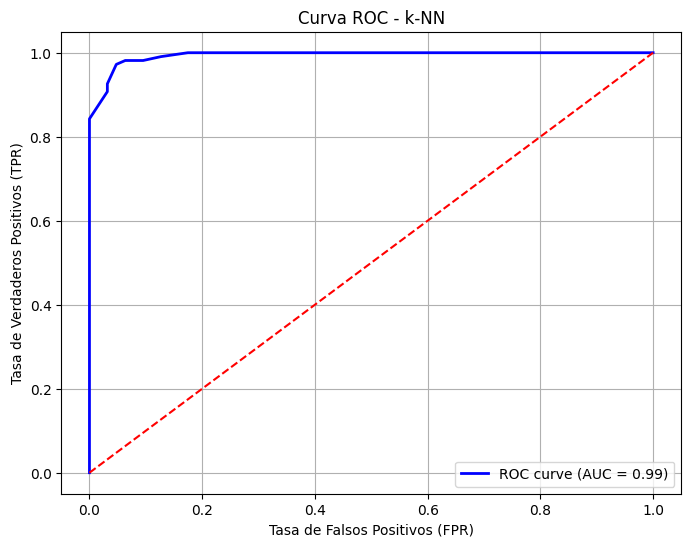

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular las probabilidades predichas por el modelo k-NN
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - k-NN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Resumen del modelo K-NN

El análisis mediante  el modelo k-NN para la clasificación de tumores, utilizando diferentes umbrales de decisión, muestra un rendimiento sólido y consistente a lo largo de diversas métricas.

- Métricas Generales: El modelo k-NN alcanzó una alta precisión, recall, F1 Score, y AUC en todos los umbrales evaluados (0.3, 0.5, y 0.7). Esto indica que el modelo es robusto en la clasificación, con un balance adecuado entre la sensibilidad y la precisión.



- Impacto del Umbral: Aunque el umbral de 0.5 es un punto de referencia común, los resultados muestran que ajustar el umbral puede afectar las métricas de clasificación. Por ejemplo, un umbral más bajo (0.3) aumenta el recall pero reduce ligeramente la precisión, lo que podría ser beneficioso en situaciones donde es crucial minimizar los falsos negativos. Un umbral más alto (0.7) mejora la precisión, pero podría pasar por alto algunos casos positivos.

- Matriz de Confusión: Las matrices de confusión para cada umbral muestran que el modelo clasifica correctamente la mayoría de los casos, con solo unos pocos falsos positivos y falsos negativos, lo que demuestra su eficacia.

- AUC y Curva ROC: El valor del AUC, cercano a 1.0 (0.9936), sugiere que el modelo tiene una excelente capacidad para distinguir entre las clases benignas y malignas, como se observa en la curva ROC. Esto refuerza la idea de que k-NN es un clasificador muy efectivo en este contexto.

**Conclusión**
El modelo k-NN, con 14 vecinos, muestra ser una buena opción para la clasificación de tumores en este conjunto de datos, logrando un alto rendimiento en todas las métricas importantes. La elección del umbral de decisión puede afinarse dependiendo de las prioridades clínicas, como la necesidad de maximizar el recall para capturar todos los casos malignos o la precisión para evitar falsos positivos

# Comparacion logistico vs K-NN
Comparando los modelos de regresión logística y k-NN en el contexto de la clasificación de tumores:

- **Precisión y Recall**: Ambos modelos mostraron un alto rendimiento con precisión y recall cercanos al 97-98%. Sin embargo, la regresión logística tiende a ser más robusta cuando las relaciones entre las variables son lineales, mientras que k-NN es más flexible y puede captar relaciones no lineales, ajustándose mejor a patrones complejos en los datos.

- **AUC**:La regresión logística demostró un rendimiento ligeramente superior con un AUC perfecto, lo que sugiere que es ideal cuando se busca una separación de clases impecable en este conjunto de datos. k-NN sigue siendo un modelo muy efectivo, especialmente en escenarios donde las relaciones no son lineales, ofreciendo una excelente capacidad de clasificación aunque no llegue al nivel de perfección de la regresión logística.

- **Umbral de decisión**: La regresión logística es más interpretativa y directa en términos de probabilidades, mientras que k-NN permite ajustar el número de vecinos y el umbral de decisión para mejorar la clasificación en diferentes contextos.

**Conclusión**
Tanto la regresión logística como k-NN son modelos altamente efectivos para la clasificación de tumores en este conjunto de datos, con un rendimiento casi idéntico en términos de AUC y precisión. La elección entre ambos puede depender del tipo de relación entre las variables: la regresión logística es ideal para relaciones lineales, mientras que k-NN es más adecuado para datos más complejos o no lineales, ofreciendo flexibilidad adicional con la posibilidad de ajustar el umbral y el número de vecinos.






